In [9]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

from skimage.feature import hog 


import os
import glob
import cv2

import time
from typing import List, Tuple
from sklearn.base import BaseEstimator

#%%time
import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm import tqdm


In [10]:
#Feature extration parameters
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (3, 3)
visualize = True
transform_sqrt = True

kernel = (1,1)
resolution=(28, 28)

In [11]:
def extract_hog_features(image):
    fd, _ = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                        cells_per_block=cells_per_block, visualize=visualize, transform_sqrt=transform_sqrt,
                        block_norm='L2-Hys', feature_vector=True)
    return fd

In [12]:
def process_imgs(imgs, kernel, resolution):
    imgs  = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in imgs])
#     imgs  = np.array([cv2.blur(img, kernel) for img in imgs])
    imgs  = np.array([cv2.resize(img , resolution) for img in imgs])
#     imgs  = np.array([img.flatten() for img in imgs])
    imgs = np.array([extract_hog_features(img) for img in imgs])
    return imgs

In [14]:
ones = [cv2.imread(os.path.join("/home/osamaali/MAS/winter_22/SDP winter_22/Codes/Image_processing/images_augmented_bag/1",filename)) 
for filename in os.listdir("/home/osamaali/MAS/winter_22/SDP winter_22/Codes/Image_processing/images_augmented_bag/1")]
ones = process_imgs(ones, kernel, resolution)

twos = [cv2.imread(os.path.join("/home/osamaali/MAS/winter_22/SDP winter_22/Codes/Image_processing/images_augmented_bag/2",filename)) 
for filename in os.listdir("/home/osamaali/MAS/winter_22/SDP winter_22/Codes/Image_processing/images_augmented_bag/2")]
twos = process_imgs(twos, kernel, resolution)

e = [cv2.imread(os.path.join("/home/osamaali/MAS/winter_22/SDP winter_22/Codes/Image_processing/images_augmented_bag/E",filename)) 
for filename in os.listdir("/home/osamaali/MAS/winter_22/SDP winter_22/Codes/Image_processing/images_augmented_bag/E")]
e = process_imgs(e, kernel, resolution)

ocs = [cv2.imread(os.path.join("/home/osamaali/MAS/winter_22/SDP winter_22/Codes/Image_processing/images_augmented_bag/OC",filename))
for filename in os.listdir("/home/osamaali/MAS/winter_22/SDP winter_22/Codes/Image_processing/images_augmented_bag/OC")]
ocs = process_imgs(ocs, kernel, resolution)

bells = [cv2.imread(os.path.join("/home/osamaali/MAS/winter_22/SDP winter_22/Codes/Image_processing/images_augmented_bag/Bell",filename))
for filename in os.listdir("/home/osamaali/MAS/winter_22/SDP winter_22/Codes/Image_processing/images_augmented_bag/Bell")]
bells = process_imgs(bells, kernel, resolution)

X = np.array([*ones, *twos, *e , *ocs, *bells]) #* unwraps lists of lists
y = np.array([*len(ones)*['1'], *len(twos)*['2'], *len(e)*['e'], *len(ocs)*['oc'], *len(bells)*['bell']])

/tmp/ipykernel_38777/3438409350.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  imgs  = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in imgs])


In [7]:
# img = X[800].reshape(resolution[0], resolution[1])
# print(img.shape)
# plt.imshow(img, cmap='gray')


In [23]:
def evaluate(classifier: BaseEstimator,
             X: List[np.ndarray], 
             y: List[int],
             train_size: float=.8,
             random_state: int=42) -> Tuple[float, float]:
    '''
    Evaluate a classifier on a given dataset
    
    Args:
        classifier   -- a classifier from scikit-learn 
                        exposing the methods fit and predict
        X            -- the samples from the dataset
        y            -- the labels from the dataset
        train_size   -- how much of the data should be used 
                        for training (e.g. 0.1 means 10%)
        random_state -- the random state to be used for the train test split
    Returns:
        error        -- the error of the classifier on the train set given as 1-accuracy
        time_taken   -- the time it took to train the classifier (use the time library)
    '''
    # YOUR CODE HERE
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = train_size, random_state=random_state)
    start_time = time.time()
    classifier.fit(X_train, y_train)
    end_time = time.time()
    time_taken = end_time-start_time
    error = 1-(accuracy_score(classifier.predict(X_test),y_test))
    return (error, time_taken)
    

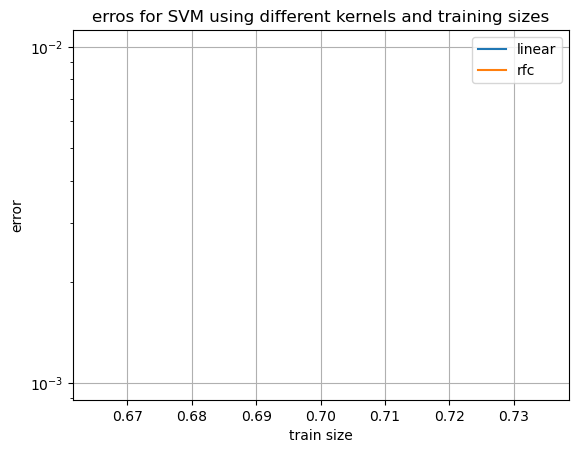

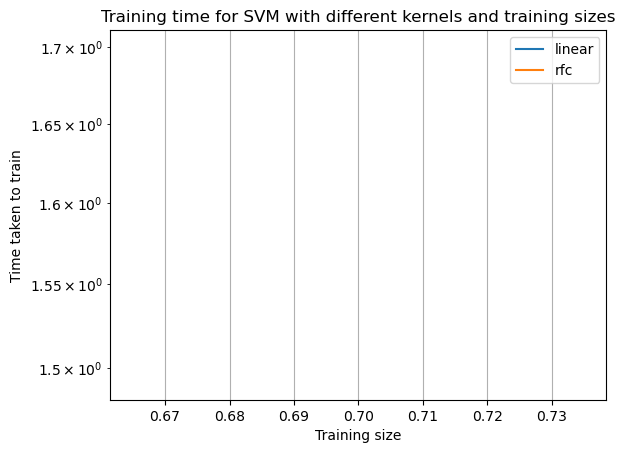

In [24]:
# YOUR CODE HERE
kernels = ["linear", "rfc"]
training_size = [0.7]
cs = []

complete_time = []
complete_error = []
for kernel in kernels:
    all_times = []
    all_errors = []
    if kernel == "rfc":
        classifier = RFC(random_state=42)
    else:
        classifier = SVC(kernel=kernel, probability=True, random_state=42)
    
    for train_size in training_size:
        error, time_taken = evaluate(classifier, X, y, train_size)
        all_errors.append(error)
        all_times.append(time_taken)
    plt.semilogy(training_size, all_errors, label = kernel)
    
#     plt.semilogy(training_sizes, all_times)
    complete_time.append(all_times)
    complete_error.append(all_errors)
    cs.append(classifier)
plt.title("erros for SVM using different kernels and training sizes")
plt.xlabel("train size")
plt.ylabel("error")
plt.grid()
plt.legend()
plt.show()


for i, time_taken in enumerate(complete_time):
    plt.semilogy(training_size, time_taken, label = kernels[i])
plt.title('Training time for SVM with different kernels and training sizes')
plt.xlabel('Training size')
plt.ylabel('Time taken to train')
plt.grid()
plt.legend()
plt.show()

In [32]:
filename = 'cs.sav'
pickle.dump(cs, open(filename, 'wb'))
        


In [33]:
# load the model from disk using 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = train_size, random_state=42)
loaded_model = pickle.load(open(filename, 'rb'))

In [34]:

model = loaded_model[0]
result = model.score(X_test, y_test)

print(y_test[:10])
pred = model.predict(X_test[:10])
print(pred)


['2' 'e' 'e' '2' '1' '1' '1' 'e' 'e' '2']
['2' 'e' 'e' '2' '1' '1' '1' 'e' 'e' '2']


1500
Accuracy: 0.996
Accuracy Score = 99.600000%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       316
           2       1.00      0.99      1.00       309
        bell       1.00      1.00      1.00       290
           e       0.99      1.00      0.99       284
          oc       0.99      0.99      0.99       301

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



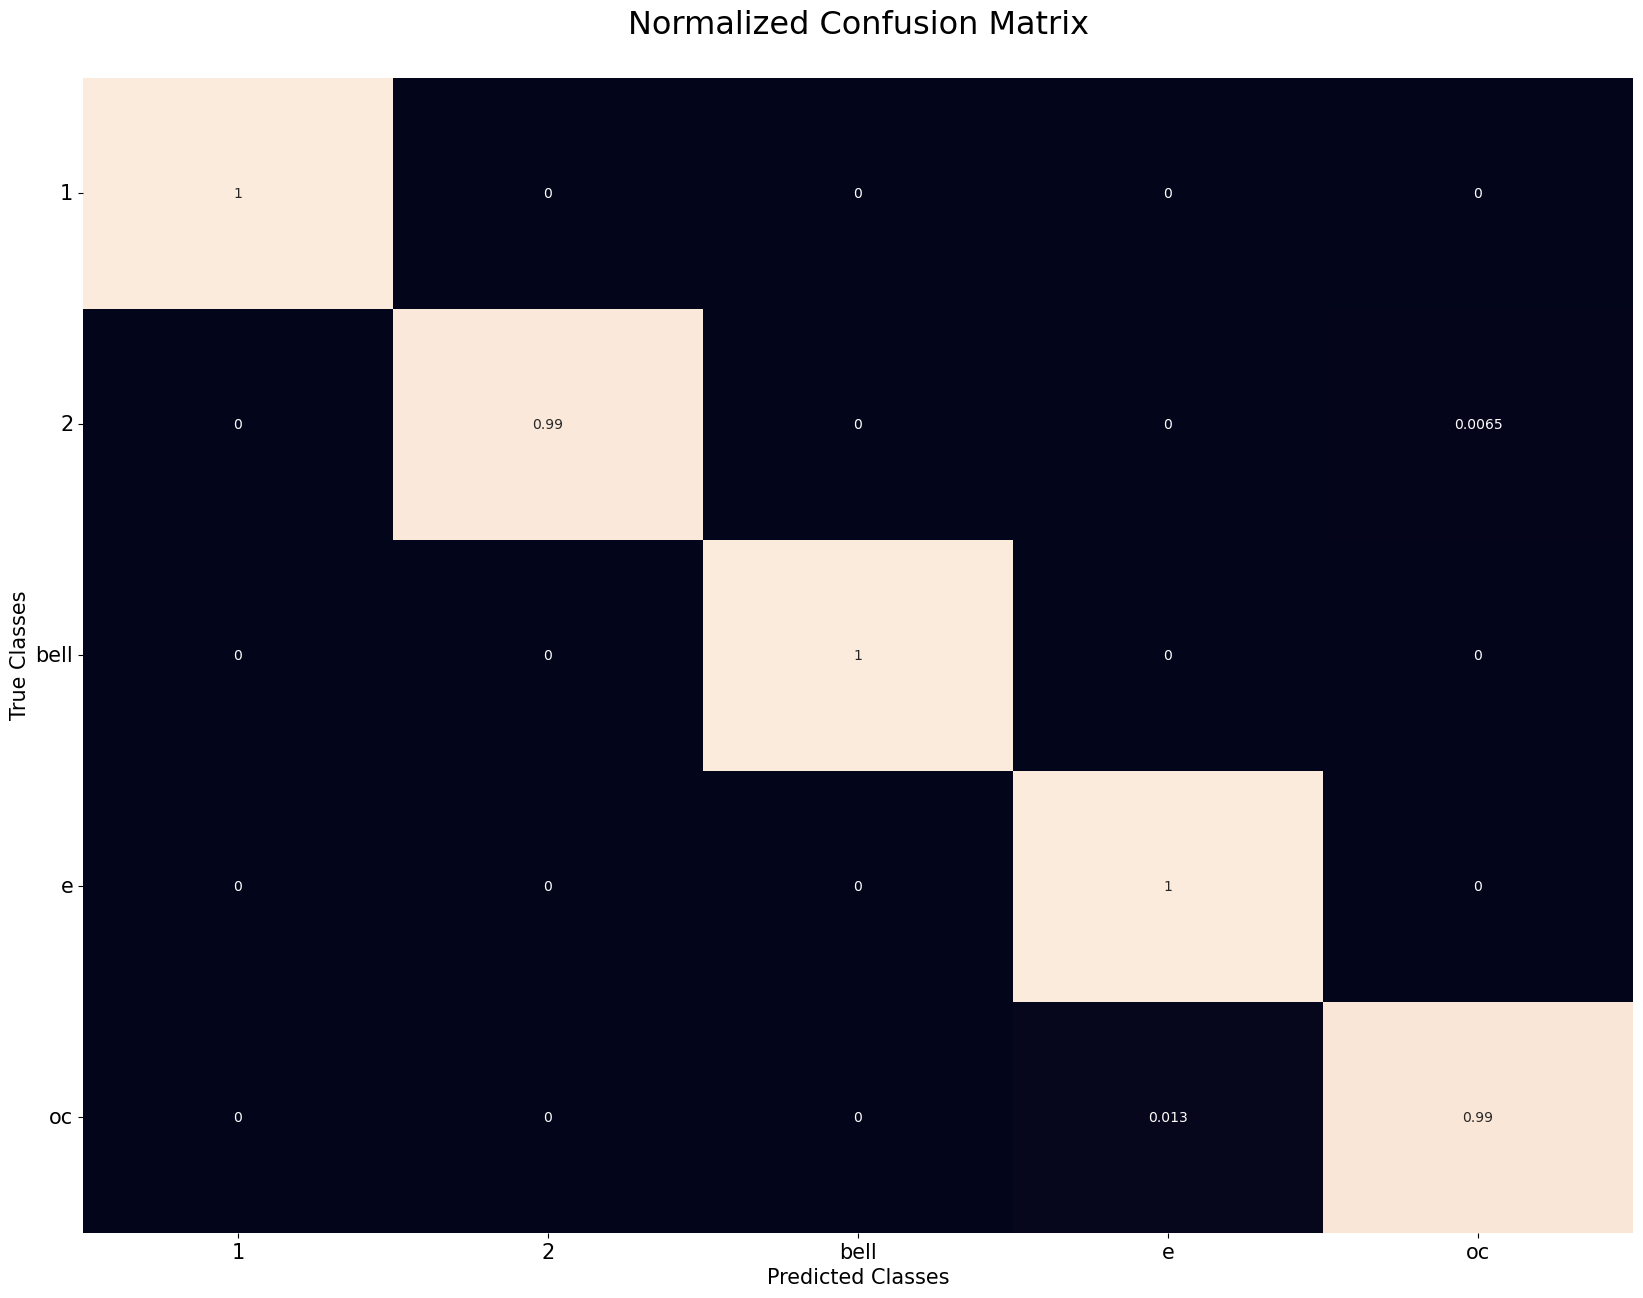

In [35]:
import seaborn as sns



# make predictions on the test data
predictions = model.predict(X_test)
print(len(predictions))



# evaluate the model's performance
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

# #plot confusion matrix

print("Accuracy Score = %f" %((accuracy_score(y_test, predictions))*100)+"%")

# # Map the numbers into letters
# y_test_letters = [labels[x] for x in y_test]
# pred_letters = [labels[x] for x in predictions]

print(classification_report(y_test, predictions))


# #Display a confusion matrix
cf_matrix = confusion_matrix(y_test, predictions, normalize='true')
plt.figure(figsize = (20,15))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)),cbar=False)
plt.title('Normalized Confusion Matrix\n', fontsize = 23)
plt.xlabel("Predicted Classes",fontsize=15)
plt.ylabel("True Classes",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15,rotation=0)
plt.savefig('Confusion_Matrix.png', dpi=300)
plt.show()





In [36]:
#save the trained classifier

import _pickle as cPickle# save the classifier
with open('SVM_linear.pkl', 'wb') as fid:
    cPickle.dump(cs[0], fid)


In [37]:
# load the .pkl model 
with open('SVM_linear.pkl', 'rb') as fid:
    clf_loaded = cPickle.load(fid)
    
    
# make predictions on the test data
predictions = clf_loaded.predict(X_test)
# print(len(predictions))
# evaluate the model's performance
accuracy = clf_loaded.score(X_test, y_test)
print("Accuracy:", accuracy)


print("Accuracy Score = %f" %((accuracy_score(y_test, predictions))*100)+"%")
# Map the numbers into letters
# y_test_letters = [labels[x] for x in y_test]
# pred_letters = [labels[x] for x in predictions]

print(classification_report(y_test, predictions))

# print(y_test[:3])
# pred = clf_loaded.predict(X_test[:3])
# print(pred)



Accuracy: 0.996
Accuracy Score = 99.600000%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       316
           2       1.00      0.99      1.00       309
        bell       1.00      1.00      1.00       290
           e       0.99      1.00      0.99       284
          oc       0.99      0.99      0.99       301

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

